<a href="https://colab.research.google.com/github/rlaalsdn0421/PROJECT/blob/main/%EB%B9%85%EB%A7%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

202012151 김민우: 빅맥의 가격은 각 나라의 경제 수준과 관련이 있는 가?

빅맥의 경제 지수: https://www.kaggle.com/yamqwe/the-big-mac-economic-index 사용


1.   세계 각 나라의 빅맥의 가격
2.   각 나라들의 빅맥 가격의 평균을 합친 빅맥의 가격
3.   각 열들의 상관 관계
4.   각 나라의 GDP와 빅맥 가격의 관계

In [123]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [124]:
df = pd.read_csv('https://raw.githubusercontent.com/rlaalsdn0421/PROJECT/main/big-mac-adjusted-index.csv')
df

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.01089,0.47526,0.84970,0.90626,0.94622
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.11695,-0.18056,0.02742,0.05883,0.08103
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.48516,0.82320,1.28595,1.35584,1.40524
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.08714,-0.20243,0.00000,0.03058,0.05218
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.24443,-0.08704,0.14468,0.17968,0.20441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2021-07-01,UKR,UAH,Ukraine,65.00,27.220000,2.387950,3653.110,3.063007,-0.25112,-0.31414,-0.25869,-0.00960,-0.24829
808,2021-07-01,ARE,AED,United Arab Emirates,14.75,3.673150,4.015627,31982.230,4.183747,-0.07801,-0.15560,-0.08734,0.21933,-0.07453
809,2021-07-01,USA,USD,United States,5.65,1.000000,5.650000,63415.990,5.427311,0.00000,-0.08415,-0.01012,0.32250,0.00378
810,2021-07-01,URY,UYU,Uruguay,225.00,44.000000,5.113636,15777.960,3.542683,0.38654,0.26986,0.37252,0.83371,0.39178


사용하지 않는 dollar_ex, adj_price 제거

In [142]:
df = df[['date',	'iso_a3',	'currency_code',	'name',	'local_price', 'dollar_price',	'GDP_dollar',	'USD', 'EUR',	'GBP', 'JPY',	'CNY']]
df

,date,iso_a3,currency_code,name,local_price,dollar_price,GDP_dollar,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.839685,9138.177,1.01089,0.47526,0.84970,0.90626,0.94622
1,2011-07-01,AUS,AUD,Australia,4.56,4.943724,55589.549,0.11695,-0.18056,0.02742,0.05883,0.08103
2,2011-07-01,BRA,BRL,Brazil,9.50,6.162429,10816.487,1.48516,0.82320,1.28595,1.35584,1.40524
3,2011-07-01,GBR,GBP,Britain,2.39,3.891637,36119.846,0.08714,-0.20243,0.00000,0.03058,0.05218
4,2011-07-01,CAN,CAD,Canada,4.73,5.000793,46214.914,0.24443,-0.08704,0.14468,0.17968,0.20441
...,...,...,...,...,...,...,...,...,...,...,...,...
807,2021-07-01,UKR,UAH,Ukraine,65.00,2.387950,3653.110,-0.25112,-0.31414,-0.25869,-0.00960,-0.24829
808,2021-07-01,ARE,AED,United Arab Emirates,14.75,4.015627,31982.230,-0.07801,-0.15560,-0.08734,0.21933,-0.07453
809,2021-07-01,USA,USD,United States,5.65,5.650000,63415.990,0.00000,-0.08415,-0.01012,0.32250,0.00378
810,2021-07-01,URY,UYU,Uruguay,225.00,5.113636,15777.960,0.38654,0.26986,0.37252,0.83371,0.39178


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           812 non-null    object 
 1   iso_a3         812 non-null    object 
 2   currency_code  812 non-null    object 
 3   name           812 non-null    object 
 4   local_price    812 non-null    float64
 5   dollar_price   812 non-null    float64
 6   GDP_dollar     812 non-null    float64
 7   USD            812 non-null    float64
 8   EUR            812 non-null    float64
 9   GBP            812 non-null    float64
 10  JPY            812 non-null    float64
 11  CNY            812 non-null    float64
dtypes: float64(8), object(4)
memory usage: 76.2+ KB


1.   세계 각 나라의 빅맥의 가격

In [133]:
gpby = df.groupby('name')['date']
layout = go.Layout(title="Country Average dollar_price", xaxis=dict(title="Years"), yaxis=dict(title="All country average dollar_price"), hovermode="closest")
fig=go.Figure()
fig.layout = layout

for target,features in df.groupby('name'):
  fig.add_scatter(x=features['date'], y=features['dollar_price'], name=target, mode='markers')
fig.show()

2. 각 나라들의 빅맥 가격의 평균을 합친 빅맥의 가격

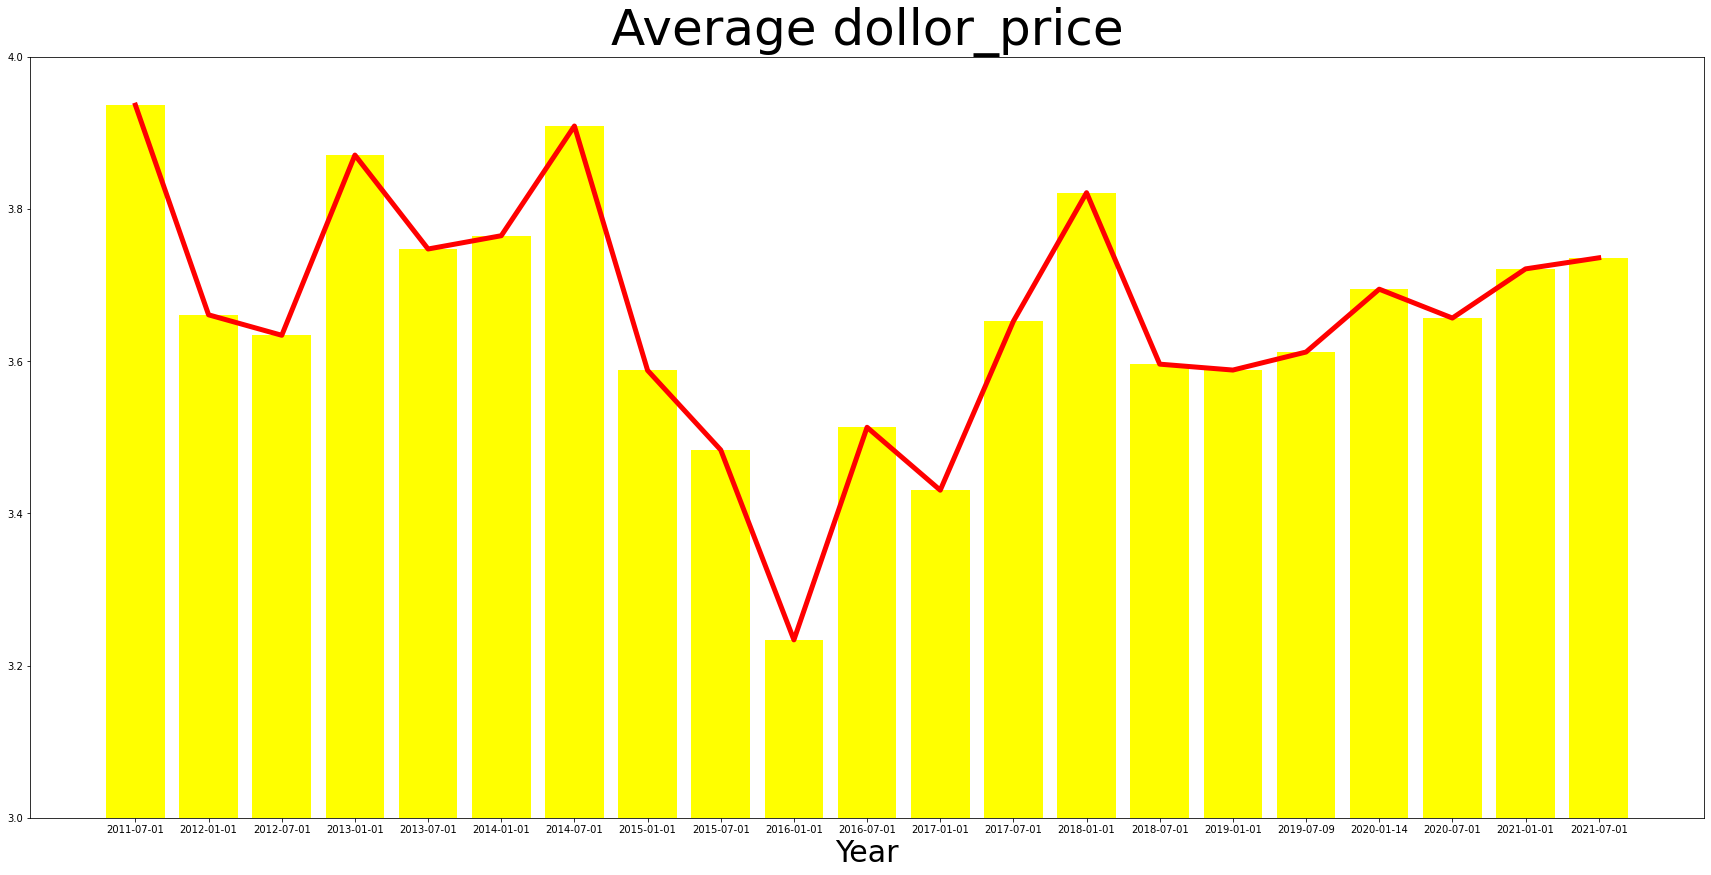

In [134]:
a = dict(df.groupby('date')['dollar_price'].mean())

fig, ax = plt.subplots(figsize=(30, 14))
plt.bar(a.keys(),a.values(), color='yellow')
sns.lineplot(a.keys(), a.values(), lw=5, color='red')
plt.title("Average dollor_price", fontsize=50)
plt.xlabel('Year', fontsize=30)
ax.set_ylim(3.,4)

plt.show()

3.   각 열들의 상관 관계

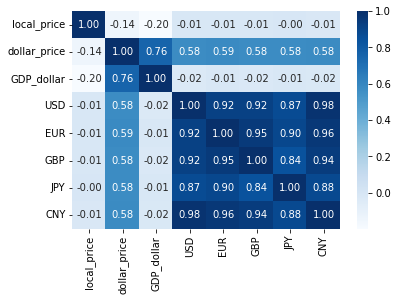

In [141]:
df1 = df.corr()
ax = sns.heatmap(df1, annot=True, fmt=".2f", cmap='Blues')

4.   각 나라의 GDP와 빅맥 가격의 관계

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['dollar_price']]
y = df.GDP_dollar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

lin = LinearRegression()

lin.fit(X_train, y_train)
y_prediction =  lin.predict(X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Mean Absolute Error', mean_absolute_error(y_test,y_prediction))
print('Mean Squared Error ', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('R2-Square ', r2_score(y_test,y_prediction))

Mean Absolute Error 11170.183805156283
Mean Squared Error  213604550.01237842
root_mean_squared error  14615.216386094953
R2-Square  0.5740471583788714


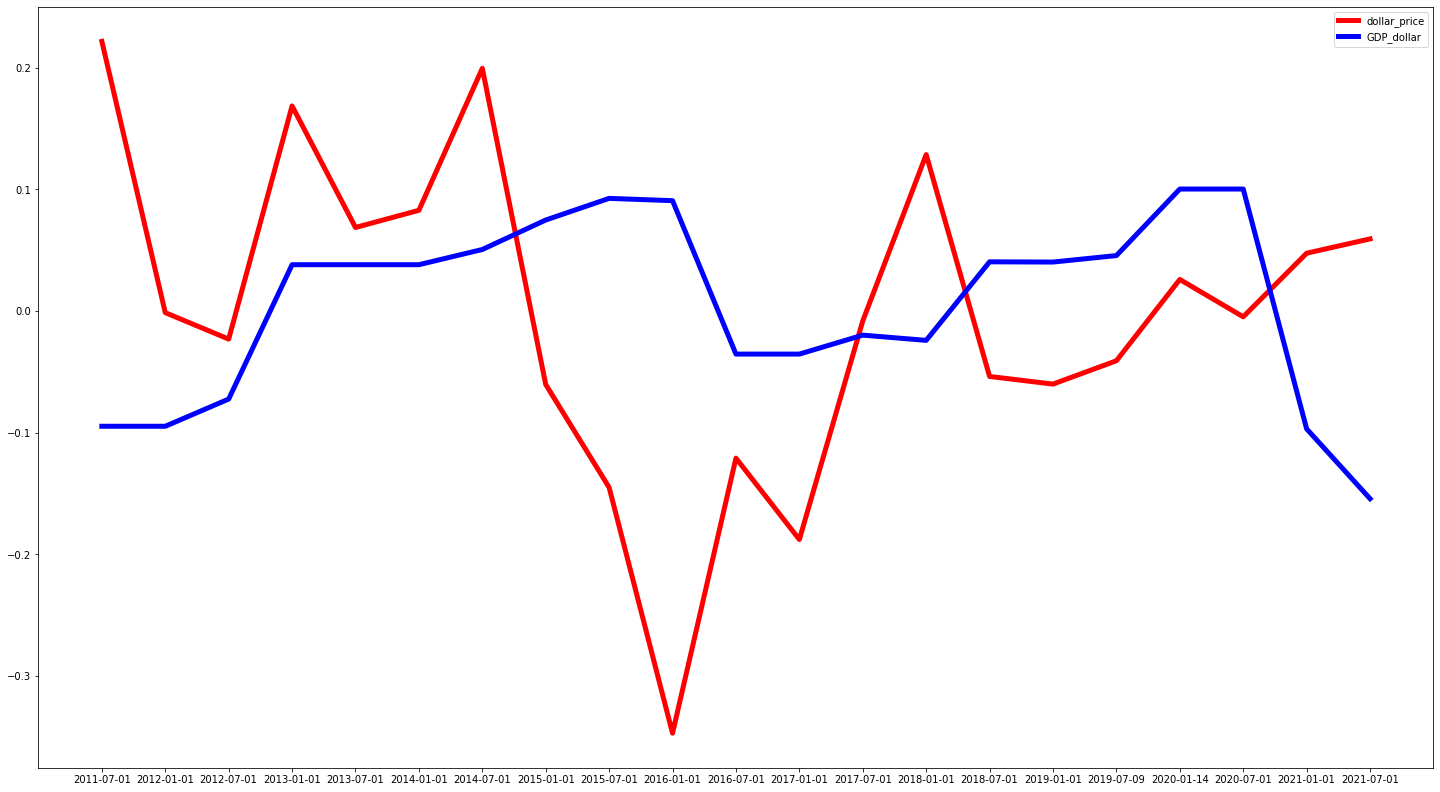

In [148]:
df3 = df.filter(['date'])
df4 = df.filter(['dollar_price', 'GDP_dollar']) 
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_std = pd.DataFrame(std_scaler.fit_transform(df4), columns=df4.columns)
merge = pd.merge(df3, df_std,left_index=True, right_index=True, how='right')
merge.head()

b = dict(merge.groupby('date')['dollar_price'].mean())
c = dict(merge.groupby('date')['GDP_dollar'].mean())

fig, ax = plt.subplots(figsize=(25, 14))
sns.lineplot(b.keys(), b.values(), lw=5, color='red')
sns.lineplot(c.keys(), c.values(), lw=5, color='blue')
ax.legend(['dollar_price', 'GDP_dollar'], facecolor='w')
plt.show()

참조: https://www.kaggle.com/jeongbinpark/visualization-big-mac-index, 수업 자료